# Final Project: Home Credit Default Risk Competition

## *In this final project, we will build the best model (as judged by the ROC_AUC score) using the Home Credit default dataset. The objective of this data science project is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:*
- Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from th饿features
- Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

In [9]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [164]:
# load dataset
df = pd.read_csv('./datasets/application_train.csv')

### EDA analysis

In [165]:
df.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


In [166]:
pd.set_option('display.max_columns', None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [167]:
df.shape

(307511, 122)

## *Missing Values*

In [168]:
# A lot of missing values, how do we know if those are MCAR, MAR, MNAR and the treament to such.

# looks like majority of the columns related to large missing percentage are related to housing.

In [169]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        pd.set_option('display.max_rows', None)
        return mz_table.head(20)

missing_zero_values_table(df)

Your selected dataframe has 122 columns and 307511 Rows.
There are 67 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
COMMONAREA_MEDI,8691,214865,69.9,223556,72.7,float64
COMMONAREA_AVG,8442,214865,69.9,223307,72.6,float64
COMMONAREA_MODE,9690,214865,69.9,224555,73.0,float64
NONLIVINGAPARTMENTS_MEDI,56097,213514,69.4,269611,87.7,float64
NONLIVINGAPARTMENTS_MODE,59255,213514,69.4,272769,88.7,float64
NONLIVINGAPARTMENTS_AVG,54549,213514,69.4,268063,87.2,float64
FONDKAPREMONT_MODE,0,210295,68.4,210295,68.4,object
LIVINGAPARTMENTS_MODE,519,210199,68.4,210718,68.5,float64
LIVINGAPARTMENTS_MEDI,433,210199,68.4,210632,68.5,float64
LIVINGAPARTMENTS_AVG,418,210199,68.4,210617,68.5,float64


In [170]:
# reset display
pd.reset_option('display')

In [171]:
df['COMMONAREA_MEDI']

0         0.0144
1         0.0608
2            NaN
3            NaN
4            NaN
           ...  
307506    0.0203
307507    0.0022
307508    0.0124
307509       NaN
307510    0.0177
Name: COMMONAREA_MEDI, Length: 307511, dtype: float64

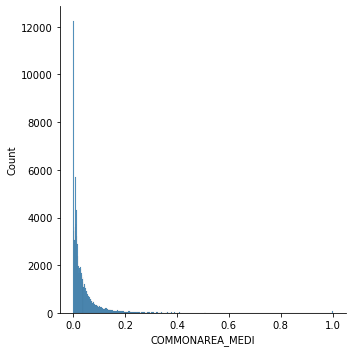

In [172]:
sns.displot(df['COMMONAREA_MEDI'])
plt.show()

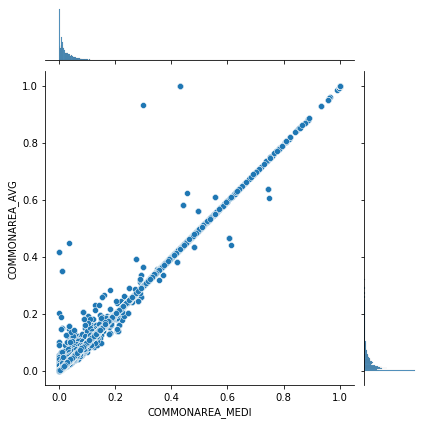

In [173]:
sns.jointplot(x = "COMMONAREA_MEDI", y = "COMMONAREA_AVG", data = df)

In [174]:
(df['FLAG_OWN_REALTY']=='Y').sum()/len(df)

0.6936727466659729

## *1. Columns That Contain a Single Value*

In [175]:
# When a predictor contains a single value, we call this a zero-variance predictor because there truly
# is no variation displayed by the predictor.

In [176]:
for i in df.columns:
    if df[i].nunique() == 1:
        print(i)

## *2. Find columns with low Variance*

## *3. Remove Duplicate data*

In [177]:
# Rows with duplicate data --- 'NONE FOUND'

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 122)


In [178]:
# Univariate analysis

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

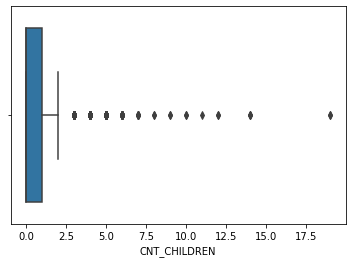

In [179]:
# only a few outlier, small impact
sns.boxplot(df['CNT_CHILDREN'])
df['CNT_CHILDREN'].value_counts()

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

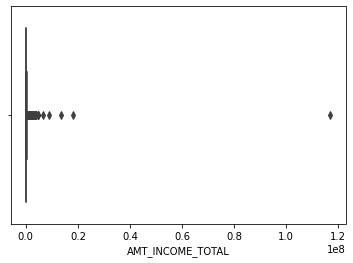

In [180]:
sns.boxplot(df['AMT_INCOME_TOTAL'])
df['AMT_INCOME_TOTAL'].nunique()
df['AMT_INCOME_TOTAL'].describe()

In [184]:
# get 95% income
df['AMT_INCOME_TOTAL'].quantile(0.95)

337500.0

In [185]:
# find number of outliers , greater than 95%
(df[df['AMT_INCOME_TOTAL'] > 337500].AMT_INCOME_TOTAL).count()

14035

In [186]:
df['AMT_INCOME_TOTAL'].skew()

391.5596541041876

In [190]:
# replace outliers with 95% value
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL']> 337500, 337500,df['AMT_INCOME_TOTAL'])

In [191]:
df['AMT_INCOME_TOTAL'].skew()

0.7836879848099682

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

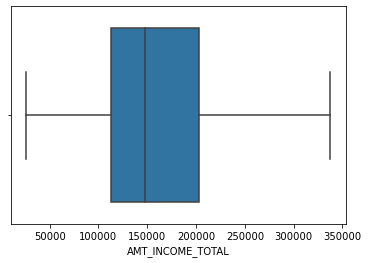

In [192]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

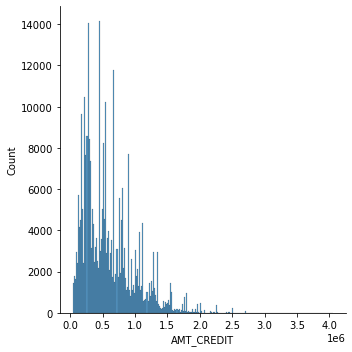

In [205]:
# ok
sns.displot(df['AMT_CREDIT'])
df['AMT_CREDIT'].describe()

In [204]:
df['AMT_CREDIT'].skew()

1.2347784971349398

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

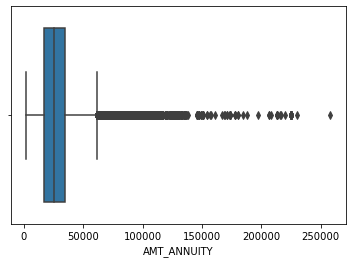

In [208]:
#

sns.boxplot(df['AMT_ANNUITY'])
df['AMT_ANNUITY'].describe()


In [207]:
df['AMT_ANNUITY'].skew()

1.5797773638612507

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

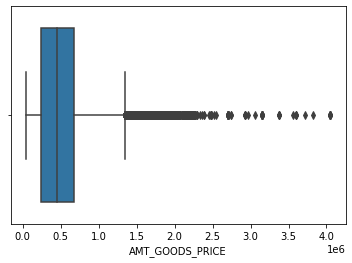

In [209]:
#

sns.boxplot(df['AMT_GOODS_PRICE'])
df['AMT_GOODS_PRICE'].describe()

In [210]:
df['AMT_GOODS_PRICE'].skew()

1.3490003414747445

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

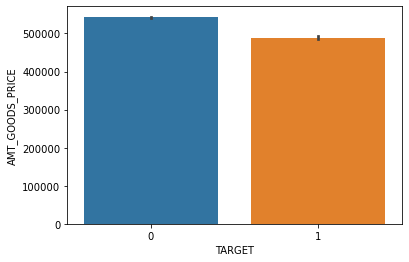

In [214]:
sns.barplot(y=df['AMT_GOODS_PRICE'],x=df['TARGET'],data=df)